<a href="https://colab.research.google.com/github/Faty177u7/geiser/blob/main/geisers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extracción de conocimientos.

**Profesor:** Salvador HM.

**Nombre:** Fatima Yatcin Perez Cruz.

**Grupo:** IDGS-91

#Problema

Se tiene un conjunto de datos de erupciones de géiseres, y se desean clasificar para su estudio.

Los datos que se tiene son: 

* TimeEruption- Tiempo de erupción en minutos.

* TimeWaiting- Tiempo de espera para la siguiente erupción.

#Importar Librerias

In [134]:
import pandas as pd
import numpy as np
import matplotlib 
import sklearn
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


Versiones

In [135]:
print("Pandas {}".format(pd.__version__))
print("Numpy {}".format(np.__version__))
print("Matplotlib {}".format(matplotlib.__version__))
print("Sklearn {}".format(sklearn.__version__))


Pandas 1.1.5
Numpy 1.19.5
Matplotlib 3.2.2
Sklearn 1.0.1


#Cargar Dataset

In [136]:
df = pd.read_csv("geisers.csv")

#Información del Dataframe

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeEruption  272 non-null    float64
 1   TimeWaiting   272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [138]:
df.head()

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [139]:
df.describe()

,TimeEruption,TimeWaiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


#Graficar Dataframe

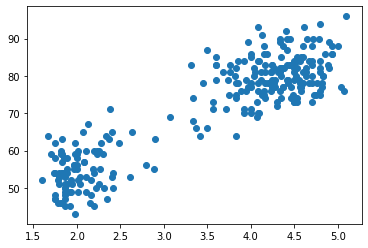

In [140]:
plt.scatter(df['TimeEruption'],df['TimeWaiting'])
plt.show()

#Datos aleatorios

Conjunto de datos 

In [141]:
TimeEruption = np.random.randint(100,size=100)
TimeWaiting= np.random.randint(100,size=100)

data ={
    'TimeEruption': TimeEruption,
    'TimeWaiting': TimeWaiting
}
df = pd.DataFrame(data)

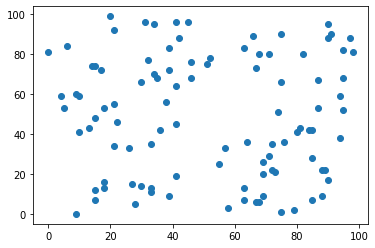

In [142]:
plt.scatter(df_s['TimeEruption'],df_s['TimeWaiting'])
plt.show()

#Configurar Modelo

In [143]:
model = KMeans(n_clusters=2,max_iter=100)

#Estandarizar Los Datos

In [144]:
df = StandardScaler().fit_transform(df)

#Graficar  Valores Estandarizados

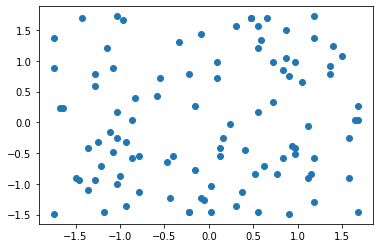

In [145]:
plt.scatter(df[:,0],df[:,1])
plt.show()

#Entrenamiento

In [146]:
model.fit(df)

KMeans(max_iter=100, n_clusters=2)

#Cenoides

In [147]:
cenoides = model.cluster_centers_
cenoides

array([[ 0.84688851,  0.36298837],
       [-0.81367719, -0.34875353]])

#Ver Las Etiquetas

In [148]:
model.labels_

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int32)

#Graficar los Cenoides

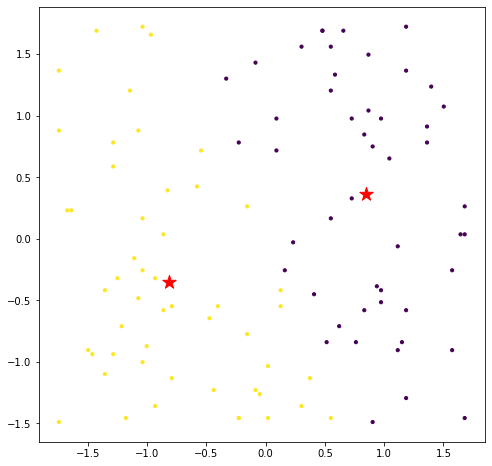

In [149]:
plt.figure(figsize=[8,8])
plt.scatter(df[:,0],df[:,1], c=model.labels_.astype(float),s=10,label="clusters")
plt.scatter(cenoides[:,0],cenoides[:,1], c="red", marker="*", s=200,label="cenoides")
plt.show()

#Predicciones

In [150]:
new_label = model.predict([[-1.0,0.0]])
new_label[0]

1

#Seleccionar El numero de Clusters

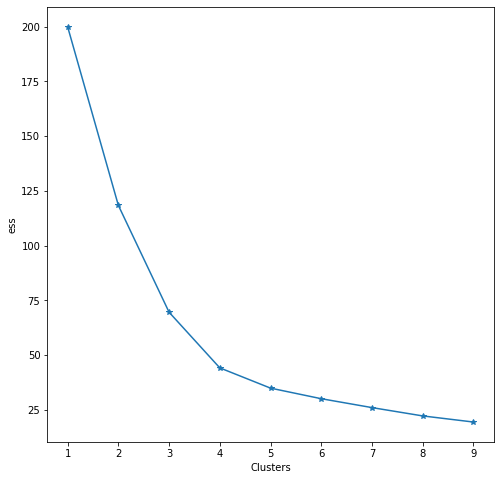

In [151]:
ess = [] #Suma de la distancia al cuadrado.
list_k = list(range(1,10))

for k  in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  ess.append(model.inertia_)

plt.figure(figsize=[8,8])
plt.plot(list_k,ess, '-*')
plt.xlabel("Clusters")
plt.ylabel("ess")
plt.show()

#Graficar con distintos Clusters

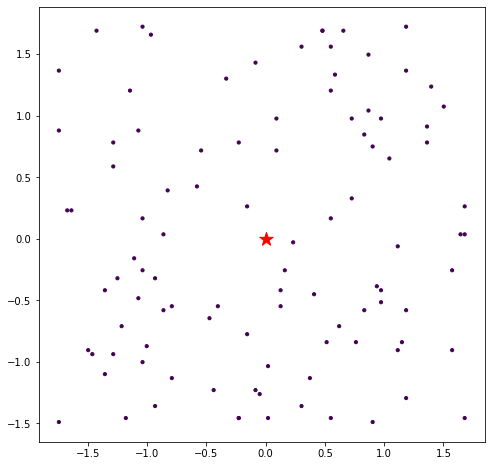

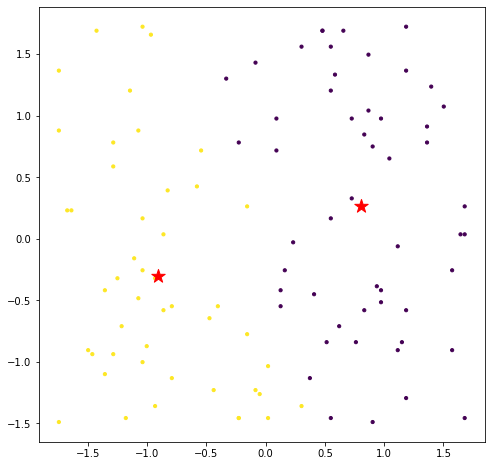

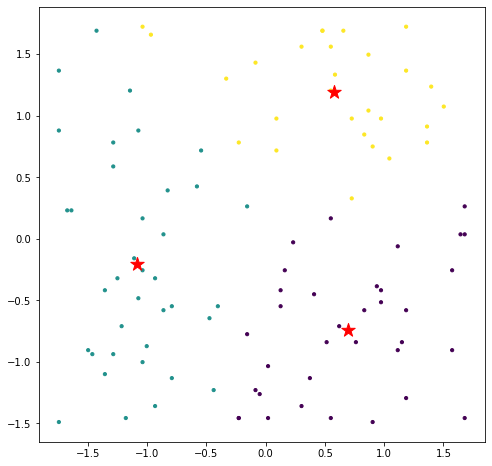

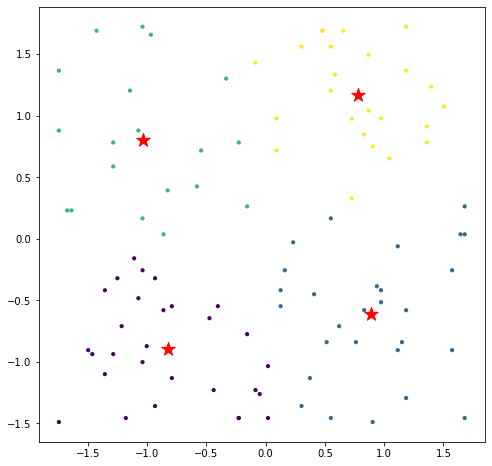

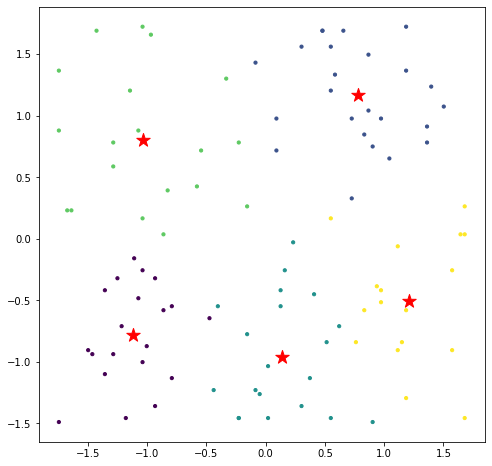

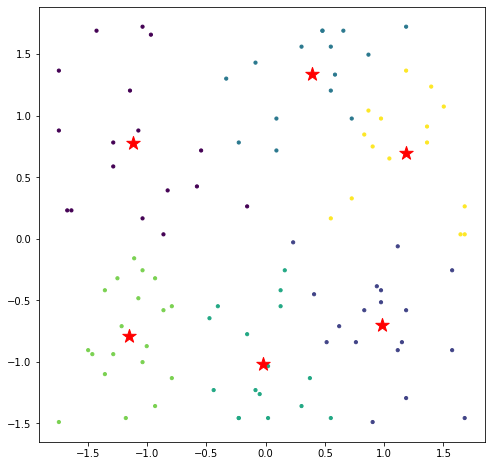

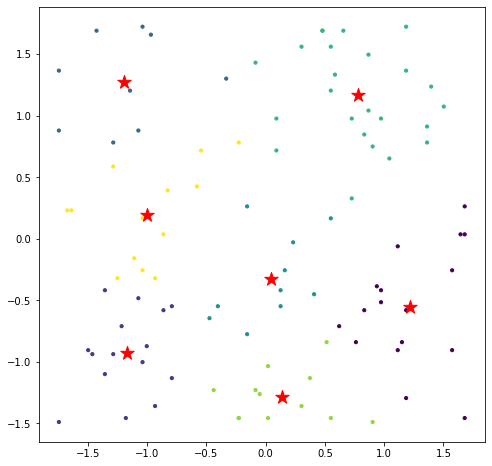

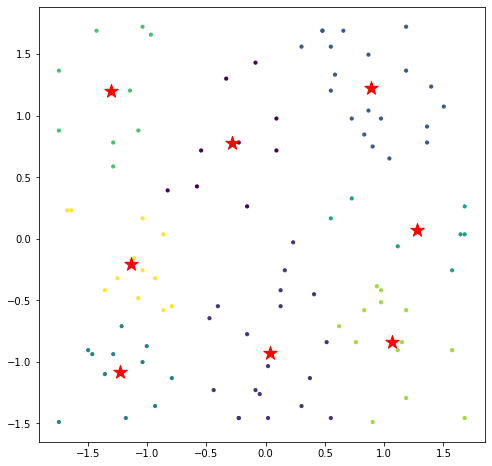

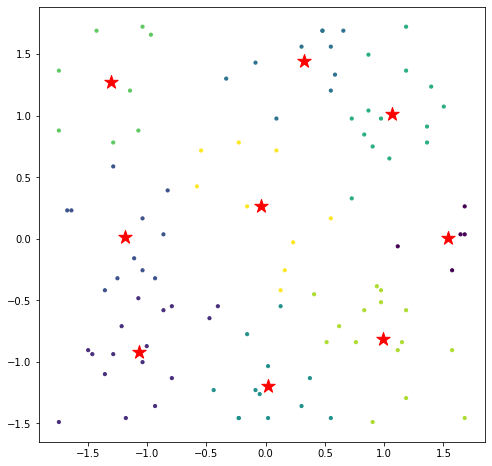

In [152]:
list_k = list(range(1,10))

for k  in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  cenoides = model.cluster_centers_
  plt.figure(figsize=[8,8])
  plt.scatter(df[:,0],df[:,1], c=model.labels_.astype(float),s=10,label="clusters")
  plt.scatter(cenoides[:,0],cenoides[:,1], c="red", marker="*", s=200,label="cenoides")
  plt.show()


#Conclusión.

El uso de KMeans nos es de gran utilidad, ya que nos permite hacer agrupaciones de los datos que estan sin etiquetas, tambien nos permite entrenar el modelo para poder calcular las distancias que existen entre esos puntos. KMeans se puede utilizar para comprimir imagenes, ya que en algunos casos los pixeles son muy pesados.
El entrenamiento no supervisado se refiere a cuando no se dispone de datos “etiquetados” para el entrenamiento. Ya que Sólo conocemos los datos de entrada, pero no existen datos de salida que correspondan a un determinado input. Por tanto, sólo podemos describir la estructura de los datos, para intentar encontrar algún tipo de organización que simplifique el análisis.

**Importante** KMeans solo funciona con datos numericos, por lo tanto las variables categoricas no funcionan,  ya que solo se trabaja con distacias, para la realización de agrupaciones, por otro lado si decidimos trasformarlas a categoricas con datos domi tampoco funcionara KMeans.